# Homework 6, Part Two: A dataset about dogs.

Data from [a FOIL request to New York City](https://www.muckrock.com/foi/new-york-city-17/pet-licensing-data-for-new-york-city-23826/)

## Do your importing and your setup

In [2]:
import pandas as pd

## Read in the file `NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx` and look at the first five rows

In [5]:
df = pd.read_excel("NYC_Dog_Licenses_Current_as_of_4-28-2016.xlsx")

## How many rows do you have in the data? What are the column types?

If there are more than 30,000 rows in your dataset, go back and only read in the first 30,000.

In [6]:
df.shape

#81937 rows

(81937, 15)

In [7]:
df.head()

,Owner Zip Code,Animal Name,Animal Gender,Primary Breed,Secondary Breed,Animal Dominant Color,Animal Secondary Color,Animal Third Color,Animal Birth,Spayed or Neut,Guard or Trained,Vaccinated,Application Date,License Issued Date,License Expired Date
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12


In [8]:
df.dtypes

Owner Zip Code                     int64
Animal Name                       object
Animal Gender                     object
Primary Breed                     object
Secondary Breed                   object
Animal Dominant Color             object
Animal Secondary Color            object
Animal Third Color                object
Animal Birth              datetime64[ns]
Spayed or Neut                    object
Guard or Trained                  object
Vaccinated                        object
Application Date          datetime64[ns]
License Issued Date       datetime64[ns]
License Expired Date      datetime64[ns]
dtype: object

## Describe the dataset in words. What is each row? List two column titles along with what each of those columns means.

For example: “Each row is an animal in the zoo. `is_reptile` is whether the animal is a reptile or not”

In [64]:
#Each row contains the details of a dog pet that has been issued a license.
#Owner zip code -> where the owner lives in NYC
#Animal name -> dog's name
#Animal gender -> whether dog is male or female
#Primary Breed -> what is the dog's main type
#Secondary Breed -> If the dog is a mixed breed, what is the other breed that it is 
#Animal Dominant Color -> main color of dog
#Animal Secondary Color -> if dog has another color
#Animal Third Color  -> If dog has a third color
#Animal Birth -> What date animal was born 
#Spayed or Neut -> Whether dog was spayed or neutered 
#Guard or Trained  -> Whether dog is a guard dog or trained
#Vaccinated -> whether dog was vaccinated or not 
#Application Date-> date owner applied for license
#License Issued Date   -> date license issued
#License Expired Date-> date license expires 

# Your thoughts

Think of four questions you could ask this dataset. **Don't ask them**, just write them down in the cell below. Feel free to use either Markdown or Python comments.

In [ ]:
#1. Male to female ratio of pet dogs
#2. Which part of NYC has the most dog owners
#3. What are the top five colors pet dogs in NYC have
#4. How many pet dogs have the name Buddy 

# Looking at some dogs

## What are the most popular (primary) breeds of dogs? Graph the top 10.

<AxesSubplot: >

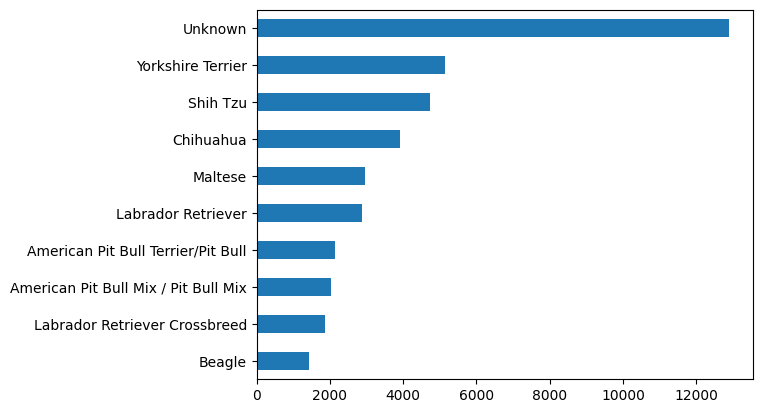

In [9]:
df['Primary Breed'].value_counts().head(10).sort_values().plot(kind='barh')

## "Unknown" is a terrible breed! Graph the top 10 breeds that are NOT Unknown

In [11]:
df.columns = df.columns.str.lower().str.replace(" ", "_")
df.columns

Index(['owner_zip_code', 'animal_name', 'animal_gender', 'primary_breed',
       'secondary_breed', 'animal_dominant_color', 'animal_secondary_color',
       'animal_third_color', 'animal_birth', 'spayed_or_neut',
       'guard_or_trained', 'vaccinated', 'application_date',
       'license_issued_date', 'license_expired_date'],
      dtype='object')

In [13]:
df[df.primary_breed == 'Unknown']

no_unknown_df = df.drop[primary_breed == 'Unknown']

NameError: name 'primary_breed' is not defined

## What are the most popular dog names?

In [14]:
df.animal_name.value_counts().head(10)

UNKNOWN    742
Bella      527
Max        515
Charlie    403
Lola       387
Unknown    379
Rocky      354
Lucy       338
unknown    337
Coco       308
Name: animal_name, dtype: int64

## Do any dogs have your name? How many dogs are named "Max," and how many are named "Maxwell"?

In [15]:
df[df.animal_name == 'Rachel']

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date
16516,10065,Rachel,F,Maltese,NaN,WHITE,NaN,NaN,2008-10-01,Yes,No,Yes,2015-06-28 11:21:41.633,2015-06-28,2016-08-02
27105,11230,Rachel,F,Unknown,Teddy Bear,RED,TAN,NaN,2011-10-01,Yes,No,Yes,2015-08-12 14:43:03.457,2015-08-12,2016-09-06
36671,11379,Rachel,F,German Shepherd Crossbreed,NaN,TAN,NaN,NaN,2013-01-01,Yes,No,Yes,2015-09-22 15:17:11.770,2015-09-22,2016-07-24


In [21]:
max_df = df[df.animal_name == 'Max']

max_df.count()

#515 

owner_zip_code            515
animal_name               515
animal_gender             515
primary_breed             515
secondary_breed            69
animal_dominant_color     513
animal_secondary_color    375
animal_third_color        120
animal_birth              515
spayed_or_neut            515
guard_or_trained          314
vaccinated                515
application_date          515
license_issued_date       515
license_expired_date      515
dtype: int64

In [22]:
maxwell_df = df[df.animal_name == 'Maxwell']

maxwell_df.count()

#30 

owner_zip_code            30
animal_name               30
animal_gender             30
primary_breed             30
secondary_breed            4
animal_dominant_color     30
animal_secondary_color    21
animal_third_color        10
animal_birth              30
spayed_or_neut            30
guard_or_trained          19
vaccinated                30
application_date          30
license_issued_date       30
license_expired_date      30
dtype: int64

## What percentage of dogs are guard dogs?

Check out the documentation for [value counts](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html).

In [23]:
df.guard_or_trained.value_counts(normalize=True, dropna=True)*100

#0.1% are guard dogs 

No     99.897128
Yes     0.102872
Name: guard_or_trained, dtype: float64

## What are the actual numbers?

In [24]:
df.guard_or_trained.value_counts(dropna=True)

#51

No     49525
Yes       51
Name: guard_or_trained, dtype: int64

## Wait... if you add that up, is it the same as your number of rows? Where are the other dogs???? How can we find them??????

Use your `.head()` to think about it, then you'll do some magic with `.value_counts()`

In [25]:
df.head()

df.guard_or_trained.value_counts(dropna=False)

No     49525
NaN    32361
Yes       51
Name: guard_or_trained, dtype: int64

In [26]:
x = df.guard_or_trained.fillna(0)
df.guard_or_trained
df.guard_or_trained = df.guard_or_trained.str.replace("0", "No")

## Fill in all of those empty "Guard or Trained" columns with "No"

Then check your result with another `.value_counts()`

In [27]:
df.guard_or_trained.value_counts(dropna=False)

No     49525
NaN    32361
Yes       51
Name: guard_or_trained, dtype: int64

In [28]:
import numpy as np
df.guard_or_trained = df.guard_or_trained.replace(np.nan, 0)
df.guard_or_trained = df.guard_or_trained.str.replace("0", "No")
df.guard_or_trained.value_counts(dropna=False)

#why don't both work

No     49525
NaN    32361
Yes       51
Name: guard_or_trained, dtype: int64

## What are the top dog breeds for guard dogs? 

In [29]:
df.groupby("guard_or_trained").primary_breed.value_counts()

guard_or_trained  primary_breed        
No                Unknown                  11890
                  Yorkshire Terrier         3037
                  Shih Tzu                  2929
                  Chihuahua                 2227
                  Maltese                   1838
                                           ...  
Yes               Shetland Sheepdog            1
                  Siberian Husky               1
                  Weimaraner                   1
                  Welsh Corgi, Pembroke        1
                  Yorkshire Terrier            1
Name: primary_breed, Length: 211, dtype: int64

## Create a new column called "year" that is the dog's year of birth

The `Animal Birth` column is a datetime, so you can get the year out of it with the code `df['Animal Birth'].apply(lambda birth: birth.year)`.

In [30]:
df['year'] = df.animal_birth.apply(lambda birth: birth.year)
df.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007
1,10461,Indie Zephir,M,Rottweiler,NaN,BLACK,TAN,NaN,2013-04-01,No,No,Yes,2013-09-20 11:41:36.647,2014-09-20,2018-09-20,2013
2,10013,Bilal,M,Australian Cattledog,NaN,Rust,NaN,NaN,2014-09-01,Yes,NaN,No,2014-09-12 13:13:36.713,2014-09-12,2019-09-12,2014
3,10025,Buddy,M,Unknown,Cockapoo,BLOND,WHITE,NaN,2008-04-01,Yes,No,Yes,2014-09-12 15:26:51.417,2014-09-12,2017-10-20,2008
4,10013,Ali,M,Basenji,NaN,Black,NaN,NaN,2014-01-01,No,NaN,No,2014-09-12 15:43:17.707,2014-09-12,2019-09-12,2014


## Calculate a new column called “age” that shows approximately how old the dog is. How old are dogs on average?

In [31]:
df['age'] = 2022 - df.year
df.head()
df.age.median()

12.0

# Joining data together

## Which neighborhood does each dog live in?

You also have a (terrible) list of NYC neighborhoods in `zipcodes-neighborhoods.csv`. Join these two datasets together, so we know what neighborhood each dog lives in. **Be sure to not read it in as `df`, or else you'll overwrite your dogs dataframe.**

In [33]:
zipcodes_df = pd.read_csv("zipcodes-neighborhoods.csv")
zipcodes_df.shape
zipcodes_df.head()

,neighborhood,zip,borough
0,Central Bronx,10453,Bronx
1,Central Bronx,10457,Bronx
2,Central Bronx,10460,Bronx
3,Bronx Park and Fordham,10458,Bronx
4,Bronx Park and Fordham,10467,Bronx


## What is the most popular dog name in all parts of the Bronx? How about Brooklyn? The Upper East Side?

In [34]:
merged_dogs_df = df.merge(zipcodes_df, left_on="owner_zip_code",right_on="zip")
merged_dogs_df.head()

,owner_zip_code,animal_name,animal_gender,primary_breed,secondary_breed,animal_dominant_color,animal_secondary_color,animal_third_color,animal_birth,spayed_or_neut,guard_or_trained,vaccinated,application_date,license_issued_date,license_expired_date,year,age,neighborhood,zip,borough
0,10024,BLUE MACK,M,Unknown,AIREDALE TERR,BROWN,BLACK,NaN,2007-11-01,Yes,No,Yes,2012-09-19 16:01:19.647,2015-09-19,2016-09-19,2007,15,Upper West Side,10024,Manhattan
1,10024,Louie,M,Unknown,Coonhound,Black,White,Brown,2008-05-01,Yes,No,Yes,2014-09-15 16:36:20.200,2014-09-15,2017-09-03,2008,14,Upper West Side,10024,Manhattan
2,10024,Tosha,F,"Collie, Smooth Coat",NaN,BLUE MERLE,WHITE,TAN,2011-12-01,Yes,No,Yes,2014-09-16 10:22:07.867,2014-09-16,2017-10-11,2011,11,Upper West Side,10024,Manhattan
3,10024,Poppett,F,"Dachshund, Long Haired Miniature",NaN,Black,Brown,Silver,2011-02-01,Yes,NaN,Yes,2014-09-18 16:25:57.323,2014-09-18,2019-09-18,2011,11,Upper West Side,10024,Manhattan
4,10024,Harlen,M,Unknown,Plott Hound,BLACK,TAN,BROWN,2007-05-01,Yes,No,Yes,2014-09-25 17:11:20.713,2014-09-25,2016-08-20,2007,15,Upper West Side,10024,Manhattan


## What is the most common dog breed in each of the neighborhoods of NYC?

In [35]:
#UPPER EAST SIDE 
merged_dogs_df[merged_dogs_df.neighborhood.str.contains("Upper East Side",na=False)].animal_name.value_counts()

Lucy          40
Bella         31
Coco          29
Charlie       29
NO NAME       26
              ..
Rexie          1
Sami           1
GRETA          1
CLAUDIA        1
Ethel          1
Name: animal_name, Length: 3219, dtype: int64

In [36]:
#Brooklyn
merged_dogs_df[merged_dogs_df.borough.str.contains("Brooklyn",na=False)].animal_name.value_counts()

unknown                        234
Unknown                        161
UNKNOWN                        155
Max                            113
Bella                          112
                              ... 
COSITA                           1
Novimba                          1
mushka                           1
Charlie Barker Weiss Harris      1
COAL                             1
Name: animal_name, Length: 9814, dtype: int64

In [37]:
#Bronx
merged_dogs_df[merged_dogs_df.borough.str.contains("Bronx",na=False)].animal_name.value_counts()

Rocky         60
Max           56
Bella         54
Lucky         51
Princess      43
              ..
Blace          1
Beans          1
Georgie        1
COCO RAMOS     1
Mystic         1
Name: animal_name, Length: 4980, dtype: int64

## What breed of dogs are the least likely to be spayed? Male or female?

In [38]:
merged_dogs_df.groupby("neighborhood").primary_breed.value_counts()

#I'm not sure how to list them all out 

neighborhood  primary_breed        
Borough Park  Unknown                  287
              Yorkshire Terrier        115
              Shih Tzu                 100
              Chihuahua                 86
              Maltese                   83
                                      ... 
West Queens   Smooth Fox Terrier         1
              Tibetan Mastiff            1
              Tibetan Terrier            1
              Vizsla                     1
              Welsh Corgi, Cardigan      1
Name: primary_breed, Length: 5639, dtype: int64

In [39]:
merged_dogs_df.groupby("spayed_or_neut").animal_gender.value_counts()

spayed_or_neut  animal_gender
No              M                 9801
                F                 5729
Yes             M                34048
                F                31273
                                     8
Name: animal_gender, dtype: int64

## Make a new column called monochrome that is True for any animal that only has black, white or grey as one of its colors. How many animals are monochrome?

In [40]:
merged_dogs_df.animal_dominant_color.str.replace("BLACK","black")\
    .str.replace("Black","black")\
    .str.replace("GREY", "grey")\
    .str.replace("Grey","grey")\
    .str.replace("GRAY","grey")\
    .str.replace("Gray","grey")\
    .str.replace("WHITE","white")\
    .str.replace("White","white").value_counts()


#Can I just add 22171 + 18001 + 2977? 

22171 + 18001 + 2977

43149

## How many dogs are in each borough? Plot it in a graph.

<AxesSubplot: >

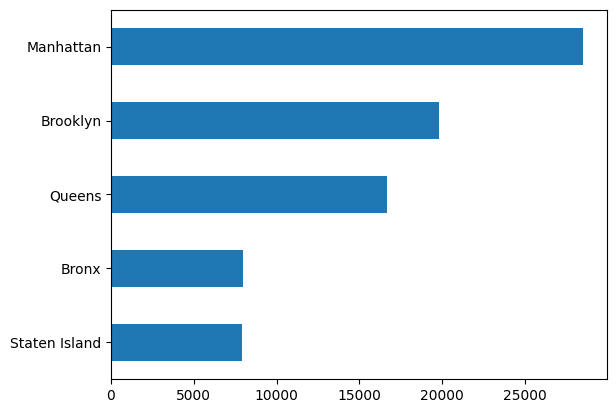

In [41]:
merged_dogs_df.borough.value_counts().sort_values().plot(kind="barh")

## Which borough has the highest number of dogs per-capita?

You’ll need to merge in `population_boro.csv`

In [47]:
population_boro_df = pd.read_csv("boro_population.csv")
population_boro_df.shape
population_boro_df.head()

,borough,population,area_sqmi
0,Manhattan,1644518,23
1,Bronx,1455444,42
2,Brooklyn,2636735,71
3,Queens,2339150,109
4,Staten Island,474558,59


## Make a bar graph of the top 5 breeds in each borough.

How do you groupby and then only take the top X number? You **really** should ask me, because it's kind of crazy.

In [48]:
merged_dogs_df.groupby("borough").primary_breed.plot(kind="barh")

TypeError: no numeric data to plot

## What percentage of dogs are not guard dogs?

In [44]:
df.guard_or_trained.value_counts(normalize=True, dropna=True)*100

#99.9% are not guard dogs 

No     99.897128
Yes     0.102872
Name: guard_or_trained, dtype: float64